### imports

In [27]:

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button, Slider

## The Central Limit Theorem

Let $X_i$ be a Bernoulli Trial

$$ X_i=   \left\{
\begin{array}{ll}
      1 & w.p & P \\
      0 & w.p & 1-P \\
\end{array}
\right.   $$

As seen in class, a series of $n$ trials will produce $k$ success with a probability that follows a Binomial Distribution:

$f(k,n,p) = Pr(X=k) = $ $n\choose k$  $p^k(1-p)^{n-k}$

We also know that the mean of the binomal distibution is as follows:

$E[f(k,n,p)] = n\cdot p$

### Generate Binomial Distribution

In [28]:
## Set Variables of the Binomial Distribution p,n ##
p = 1/3
n = 10

## Choose the number of samples to draw ##
samples = 100000

## Random Variable operations
binomial_rv = stats.binom(n, p) ## Create A Binomial Random Variable
binomial_rv_samples = binomial_rv.rvs(size=samples) ## Draw samples and save them in variable
binomial_rv_samples = np.array(binomial_rv_samples) ## Convert to np_array for convenience 

Now we would like to take the samples that we drew from the distribution and plot them as a Histogram that represents the distribution.

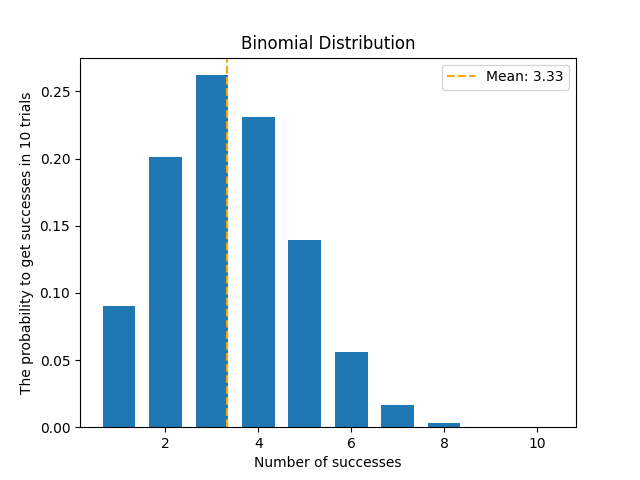

In [29]:
bins = n ## Number of bins
mean = binomial_rv.mean() ## Get the Analytical mean of the random variable - Note this is the analytical mean and not the sample mean.

## Histogram Plotting ##
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(binomial_rv_samples, bins=bins, density=True, range=(1,n+1), align='left', rwidth=0.7)
ax.axvline(mean, c='Orange', linestyle='--', label=f'Mean: {mean:.2f}')
ax.set_title('Binomial Distribution')
ax.set_xlabel('Number of successes')
ax.set_ylabel(f'The probability to get successes in {n} trials')
ax.legend()
plt.show()

### Increasing the number of trials - CLT demonstration

The $Central$ $Limit$ $Theorem$ states that when we sample values from a probability distribution and try to estimate the mean, the resulting distribution of the means tends to a normal distribution.

We can think of a bernoulli process as sampling a bernoulli Random Variable n times.
Following the central limit theorem when we increase the number of samples we should tend to a normal distribution with mean $\mu = n \cdot p$ and variance $\sigma^2 = n \cdot p \cdot 1-p$

/tmp/ipykernel_8164/132048154.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


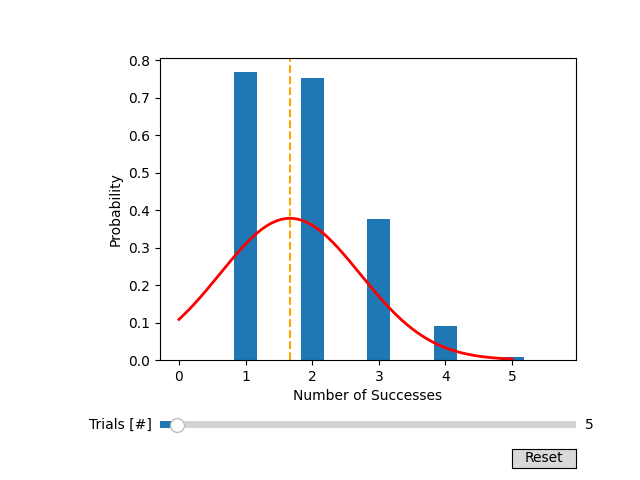

[8.91090019e-11 1.73265783e-10 3.33516504e-10 6.35528677e-10
 1.19885393e-09 2.23877624e-09 4.13874248e-09 7.57424621e-09
 1.37221995e-08 2.46105511e-08 4.36950505e-08 7.67991565e-08
 1.33626918e-07 2.30167899e-07 3.92472156e-07 6.62500556e-07
 1.10707474e-06 1.83139040e-06 2.99915024e-06 4.86215511e-06
 7.80319921e-06 1.23973790e-05 1.94984621e-05 3.03587675e-05
 4.67930348e-05 7.13989109e-05 1.07848786e-04 1.61269496e-04
 2.38727526e-04 3.49837260e-04 5.07508039e-04 7.28841490e-04
 1.03618320e-03 1.45832158e-03 2.03181124e-03 2.80237797e-03
 3.82633826e-03 5.17193798e-03 6.92048537e-03 9.16712384e-03
 1.20210649e-02 1.56050829e-02 2.00540696e-02 2.55124550e-02
 3.21303373e-02 4.00582171e-02 4.94403167e-02 6.04065692e-02
 7.30634869e-02 8.74842589e-02 1.03698563e-01 1.21682705e-01
 1.41350800e-01 1.62547758e-01 1.85044847e-01 2.08538528e-01
 2.32653136e-01 2.56947748e-01 2.80927347e-01 3.04058059e-01
 3.25785924e-01 3.45558367e-01 3.62847225e-01 3.77172046e-01
 3.88122203e-01 3.953764

In [32]:
%matplotlib widget

# The parametrized function to be plotted
def generate_binomial_samples(n_trials, p, samples):
    binomial_rv = stats.binom(n_trials, p)
    binomial_rv_samples = binomial_rv.rvs(size=samples)
    binomial_rv_samples = np.array(binomial_rv_samples)
    return binomial_rv_samples

# Define initial parameters
init_n = 5
p = 1/3
init_mean = init_n*p

# Create the figure and the line that we will manipulate
fig = plt.figure()
ax = fig.add_subplot(111)
_, _, line = ax.hist(generate_binomial_samples(init_n, p, 10000), range=(1,init_n+1), density=True, align='left', rwidth=0.7)
ax.axvline(init_mean, c='Orange', linestyle='--', label=f'Mean: {mean:.2f}')
ax.set_xlabel('Number of Successes')    
ax.set_ylabel('Probability')    
x_range = np.linspace(0, init_n, 200)
stdev = np.sqrt(init_mean*(1-p))
ax.plot(x_range, stats.norm.pdf(x_range, init_mean, stdev), c='r', lw=2, label='norm pdf')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
ax_n = fig.add_axes([0.25, 0.1, 0.65, 0.03])
n_slider = Slider(
    ax=ax_n,
    label='Trials [#]',
    valmin=1,
    valmax=100,
    valinit=init_n,
    valstep=1
)


# The function to be called anytime a slider's value changes
def update(val):
    new_n = int(n_slider.val)
    new_samples = generate_binomial_samples(new_n, p, 10000)
    mean = new_n*p
    stdev = np.sqrt(mean*(1-p))
    n_bins = new_n 
    x_range = np.linspace(0, n_bins, 200)
    print(stats.norm.pdf(x_range, mean))
    ax.cla() 
    ax.plot(x_range, stats.norm.pdf(x_range, mean, scale=stdev), c='r' ,lw=2, label='Normal Distribution')
    ax.hist(new_samples, bins=n_bins, density=True, range=(1,new_n+1), align='left', rwidth=0.7, label='Binomial Distribution') 
    ax.axvline(new_n*p, c='Orange', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.set_xlabel('Number of Successes') 
    ax.set_ylabel('Probability')    
    ax.legend()
    fig.canvas.draw_idle()


# register the update function with each slider
n_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    n_slider.reset()
button.on_clicked(reset)

plt.show()